In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
import scipy.sparse.linalg as LA
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import sys
import datetime
import scipy.special as special
sys.path.append('../')
sys.path.append('../Beating_LT')
%load_ext autoreload
%autoreload 2
from utils import *
import utils_LiebThirring as LT

In [21]:
# parameters
Lx, Ly, eps = 201, 201, 0.15
ax, ay = (Lx-1)*eps/2, (Ly-1)*eps/2 #size of the box
xx, yy = np.linspace(-ax, ax, Lx), np.linspace(-ay, ay, Ly)

In [22]:
# First rho0, a gaussian
xgrid, ygrid = np.meshgrid(xx, yy)
def f_exp(x,y): return np.exp(-(x**2 + y**2)/20)
rho0 = f_exp(xgrid, ygrid)
rho0 /= integral(rho0, eps)

# Computation for N = 1

In [30]:
#p = 1.7, s = 0.1
#p, s = 1.77, 0.02 #this works, but is very slow
p, s = 1.78, 0.01 #does not work, no binding...
nelec = 1
# first we perform a computation for a single electron
rho1, I1 = find_best_gamma(rho0, nelec, p, eps, scale = s, tol=1e-8, Niter=40)

Find best gamma with the following parameters:
nelec =  1
p =  1.78
Lx, Ly, eps, scale =  201 201 0.15 0.01
tol, Niter =  1e-08 40

Iteration  0
	Energy =  -5.595829500541697e-06
	kinetic =  6.638431117643404e-06 potential =  -1.22342606181851e-05
	Viriel =  -2.9042921645409748e-06

Iteration  1
	Energy =  -6.5997604461866105e-06
	kinetic =  9.149055249563442e-06 potential =  -1.5748815695750053e-05
	Viriel =  -3.1350209931216e-06

Iteration  2
	Energy =  -7.476533602730936e-06
	kinetic =  1.1990818501418902e-05 potential =  -1.9467352104149838e-05
	Viriel =  -3.193716139817972e-06

Iteration  3
	Energy =  -8.188940635551738e-06
	kinetic =  1.4954825482596826e-05 potential =  -2.3143766118148564e-05
	Viriel =  -3.097312089559053e-06

Iteration  4
	Energy =  -8.737454267986533e-06
	kinetic =  1.7878416639790523e-05 potential =  -2.6615870907777056e-05
	Viriel =  -2.8819626682755815e-06

Iteration  5
	Energy =  -9.141797552601455e-06
	kinetic =  2.0636341960262763e-05 potential =  -2.977

I1 =  -1.0008673404337626e-05
3I1 =  -3.0026020213012877e-05


(-15.0, 15.0, -15.0, 15.0)

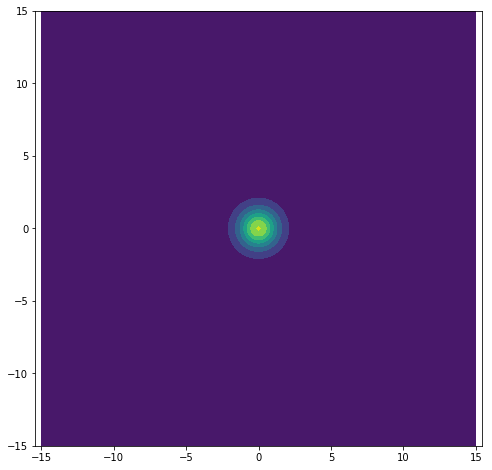

In [35]:
print("I1 = ", I1)
print("3I1 = ", 3*I1)
plt.figure(figsize = (8,8))
plt.contourf(xx,yy,rho1)
plt.axis('equal')

# N = 3

(0.0, 200.0, 0.0, 200.0)

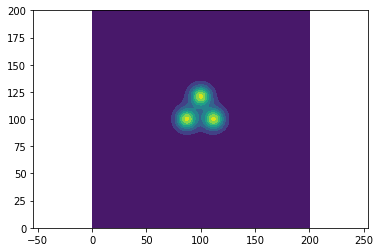

In [36]:
dist_0 = 25
rho2_0 = np.roll(rho1, -dist_0//2, axis = 1) + np.roll(rho1, dist_0//2, axis = 1)
rho3_0 = rho2_0 + np.roll(rho1, int(dist_0*np.sqrt(3)/2), axis = 0)
plt.contourf(rho3_0)
plt.axis("equal")

In [37]:
#rho3_0 = rho2 + np.roll(rho1, int(24*np.sqrt(3)/2), axis = 0)
nelec = 3
rho3, I3 = find_best_gamma(rho3_0, nelec, p, eps, scale = s, tol=1e-8, Niter=50)

Find best gamma with the following parameters:
nelec =  3
p =  1.78
Lx, Ly, eps, scale =  201 201 0.15 0.01
tol, Niter =  1e-08 50

Iteration  0
	Energy =  -2.8937249275935787e-05
	kinetic =  0.0001248722118069518 potential =  -0.0001538094610828876
	Viriel =  4.9008321622994746e-06

Iteration  1
	Energy =  -2.9053638784742435e-05
	kinetic =  0.0001225672946409357 potential =  -0.00015162093342567813
	Viriel =  4.302966568906755e-06

Iteration  2
	Energy =  -2.913651214567625e-05
	kinetic =  0.00012071099975457051 potential =  -0.00014984751190024676
	Viriel =  3.829940472378028e-06

Iteration  3
	Energy =  -2.920275126113244e-05
	kinetic =  0.00011918392426114917 potential =  -0.0001483866755222816
	Viriel =  3.4423173537695097e-06

Iteration  4
	Energy =  -2.925839468585214e-05
	kinetic =  0.00011792165157049133 potential =  -0.00014718004625634347
	Viriel =  3.121215490543418e-06

Iteration  5
	Energy =  -2.9306580650844728e-05
	kinetic =  0.00011687692449275996 potential =  -0.0001

positions of electrons =  (array([ 98,  98, 125]), array([ 84, 115, 100]))
p =  1.78
I1 =  -1.0008673404337626e-05
I3 =  -2.9931514362542937e-05
Energy gain =  9.450585046994018e-08
that is (in percent) -0.003147465091926588


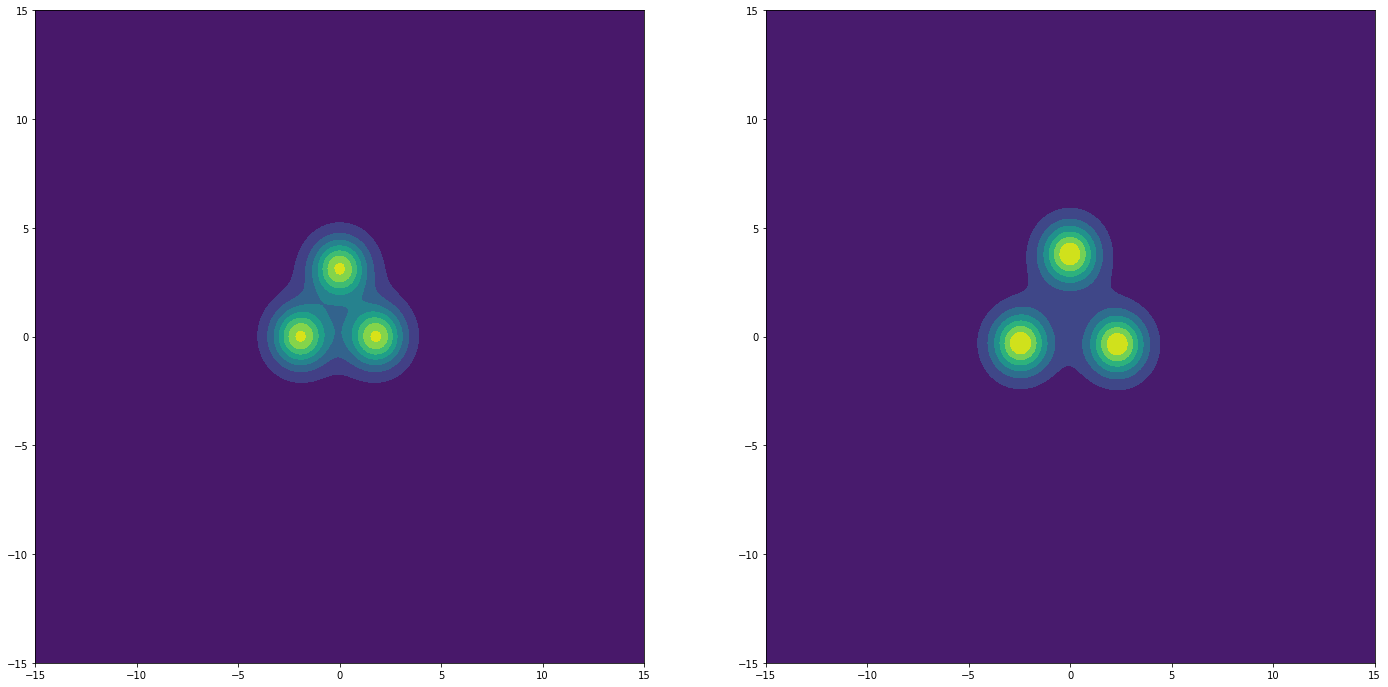

In [39]:
plt.figure(figsize = (24, 12))
plt.subplot(121)
plt.contourf(xx,yy,rho3_0)
plt.subplot(122)
plt.contourf(xx,yy,rho3)

maxima = find_maxima(rho3)
print("positions of electrons = ", maxima)

print("p = ", p)
print("I1 = ", I1)
print("I3 = ", I3)
print("Energy gain = ", I3 - 3*I1)
print("that is (in percent)", (I3-3*I1)/(3*I1))

# N = 6

In [10]:
rho6_0 = 2*rho3
nelec = 6
rho6, I6 = find_best_gamma(rho6_0, nelec, p, eps, scale = s, tol=1e-8, Niter=50)

Find best gamma with the following parameters:
nelec =  6
p =  1.77
Lx, Ly, eps, scale =  101 101 0.5 0.02
tol, Niter =  1e-08 50

Iteration  0
	Energy =  -5.696387170690961e-05
	kinetic =  0.0005941950714206899 potential =  -0.0006511589431275996
	Viriel =  9.280268521243823e-05

Iteration  1
	Energy =  -7.929599883444414e-05
	kinetic =  0.0005127595955401771 potential =  -0.0005920555943746212
	Viriel =  5.687678787171874e-05

Iteration  2
	Energy =  -8.802058410842196e-05
	kinetic =  0.00047541850776793243 potential =  -0.0005634390918763544
	Viriel =  4.157040702313953e-05

Iteration  3
	Energy =  -9.2196457905864e-05
	kinetic =  0.00045338030554999397 potential =  -0.000545576763455858
	Viriel =  3.328619768898334e-05

Iteration  4
	Energy =  -9.446675212429511e-05
	kinetic =  0.00043788655198319186 potential =  -0.000532353304107487
	Viriel =  2.7974507820426877e-05

Iteration  5
	Energy =  -9.581405171773638e-05
	kinetic =  0.0004258214858649034 potential =  -0.00052163553758263

positions of electrons =  (array([46, 46, 47, 58, 58, 69]), array([50, 63, 36, 43, 57, 50]))
I1 =  -1.7471221523395814e-05
I6 =  -0.00010320449669052754
Energy gain =  1.6228324498473415e-06
that is (in percent) -0.015481005412951018


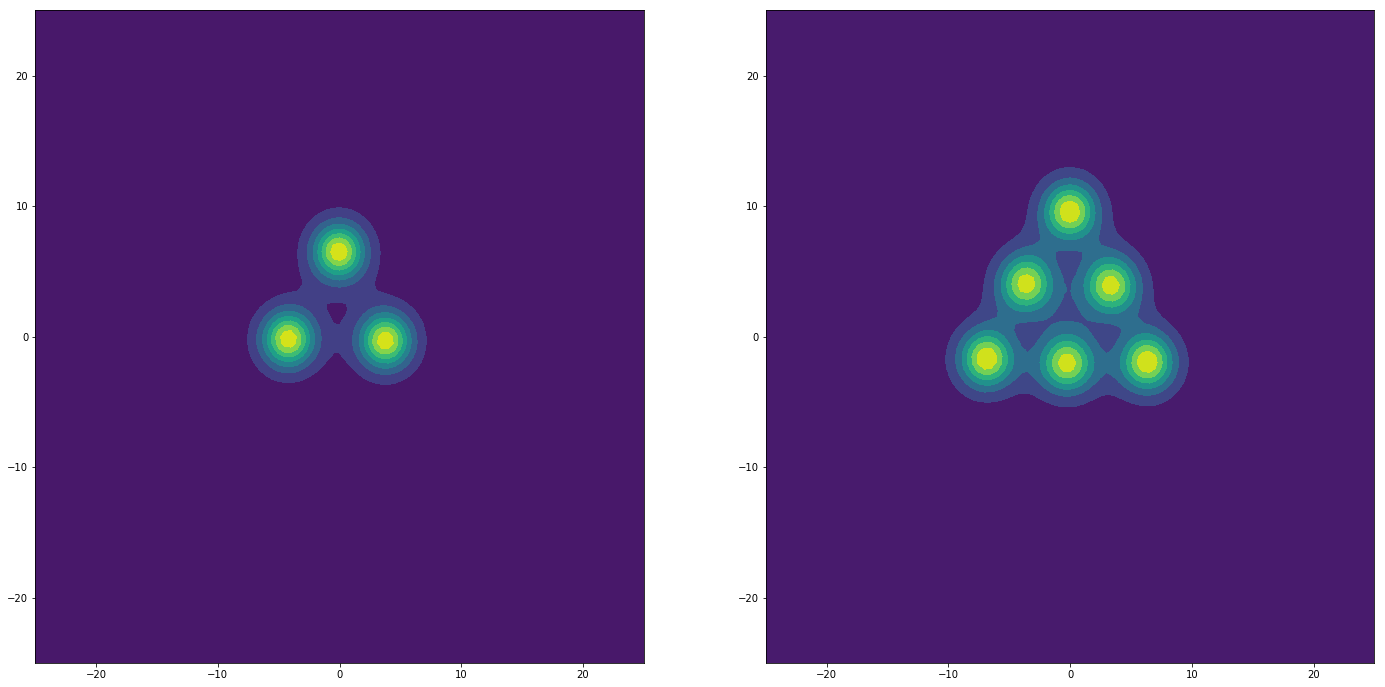

In [11]:
plt.figure(figsize = (24, 12))
plt.subplot(121)
plt.contourf(xx,yy,rho6_0)
plt.subplot(122)
plt.contourf(xx,yy,rho6)

maxima = find_maxima(rho6)
print("positions of electrons = ", maxima)

print("I1 = ", I1)
print("I6 = ", I6)
print("Energy gain = ", I6 - 6*I1)
print("that is (in percent)", (I6-6*I1)/(6*I1))

# N = 10

In [12]:
rho10_0 = 10/6*rho6
nelec = 10
rho10, I10 = find_best_gamma(rho10_0, nelec, p, eps, scale = s, tol=1e-8, Niter=50)

Find best gamma with the following parameters:
nelec =  10
p =  1.77
Lx, Ly, eps, scale =  101 101 0.5 0.02
tol, Niter =  1e-08 50

Iteration  0
	Energy =  -0.00012147296291831026
	kinetic =  0.0009469596901730956 potential =  -0.0010684326530914058
	Viriel =  0.00012426654729271304

Iteration  1
	Energy =  -0.0001394993840852318
	kinetic =  0.0008654296525227855 potential =  -0.0010049290366080173
	Viriel =  9.163429433461218e-05

Iteration  2
	Energy =  -0.0001482929072201051
	kinetic =  0.0008175056854393976 potential =  -0.0009657985926595027
	Viriel =  7.38407690915805e-05

Iteration  3
	Energy =  -0.00015325767503132203
	kinetic =  0.0007843185940660874 potential =  -0.0009375762690974095
	Viriel =  6.238486686108212e-05

Iteration  4
	Energy =  -0.00015632232137835196
	kinetic =  0.0007589788150618583 potential =  -0.0009153011364402102
	Viriel =  5.419694000289633e-05

Iteration  5
	Energy =  -0.00015835445458384396
	kinetic =  0.0007384406233793837 potential =  -0.000896795077

In [13]:
rho10, I10 = find_best_gamma(rho10, nelec, p, eps, scale = s, tol=1e-8, Niter=50)

Find best gamma with the following parameters:
nelec =  10
p =  1.77
Lx, Ly, eps, scale =  101 101 0.5 0.02
tol, Niter =  1e-08 50

Iteration  0
	Energy =  -0.0001691653983792894
	kinetic =  0.0006200568636396132 potential =  -0.0007892222620189026
	Viriel =  1.2355721885058159e-05

Iteration  1
	Energy =  -0.00016935429343426834
	kinetic =  0.0006221525017900659 potential =  -0.0007915067952243343
	Viriel =  1.269226946732857e-05

Iteration  2
	Energy =  -0.00016954263281676813
	kinetic =  0.0006242733876459097 potential =  -0.0007938160204626778
	Viriel =  1.3035051889647743e-05

Iteration  3
	Energy =  -0.00016972909033243205
	kinetic =  0.0006263977215966679 potential =  -0.0007961268119291
	Viriel =  1.3380076411260901e-05

Iteration  4
	Energy =  -0.00016991243353628427
	kinetic =  0.0006285035768359122 potential =  -0.0007984160103721965
	Viriel =  1.3723248849320914e-05

Iteration  5
	Energy =  -0.00017009157628741875
	kinetic =  0.0006305696839532602 potential =  -0.0008006612

positions of electrons =  (array([41, 41, 42, 42, 54, 54, 54, 66, 67, 79]), array([56, 71, 28, 42, 35, 50, 64, 57, 43, 50]))
I1 =  -1.7471221523395814e-05
I10 =  -0.00017369890410102908
Energy gain =  1.0133111329290573e-06
that is (in percent) -0.005799887154839898


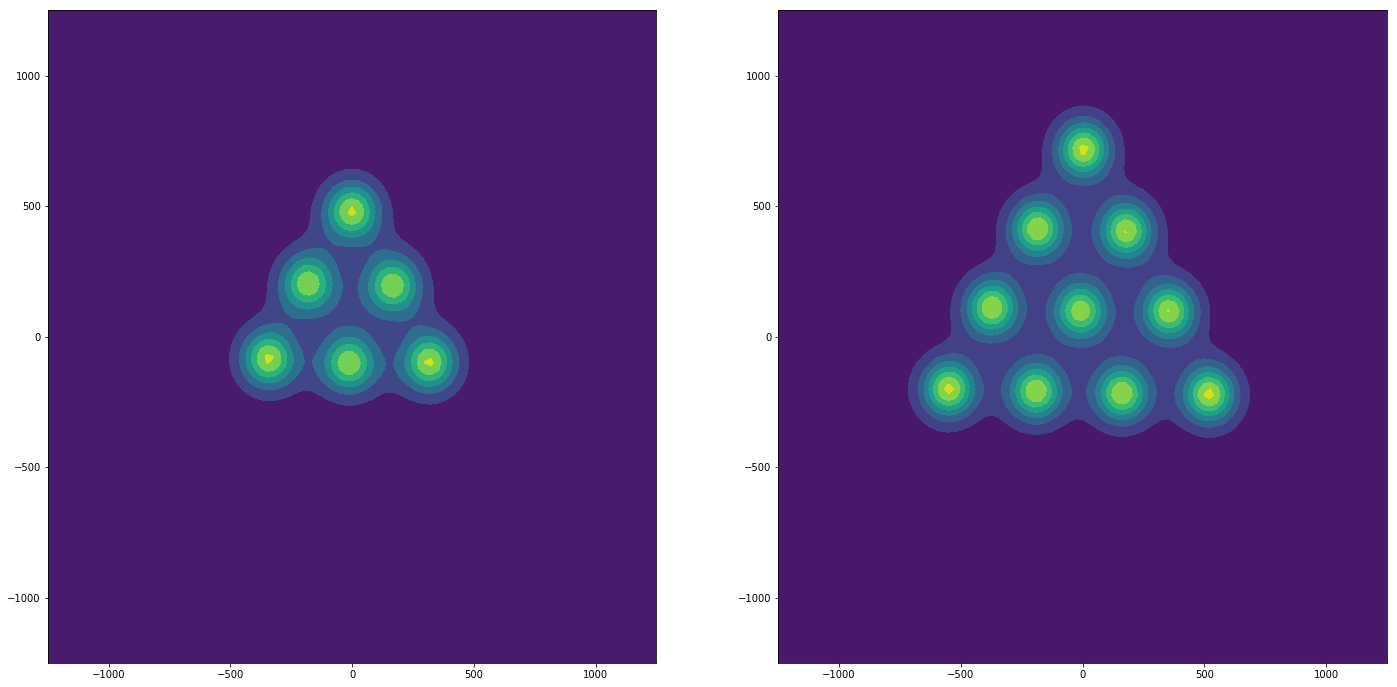

In [14]:
plt.figure(figsize = (24, 12))
plt.subplot(121)
plt.contourf(xx/s,yy/s,rho10_0)
plt.subplot(122)
plt.contourf(xx/s,yy/s,rho10)

maxima = find_maxima(rho10)
print("positions of electrons = ", maxima)

print("I1 = ", I1)
print("I10 = ", I10)
print("Energy gain = ", I10 - 10*I1)
print("that is (in percent)", (I10-10*I1)/(10*I1))

# Check Lieb-Thirring

kappa =  1.2987012987012987


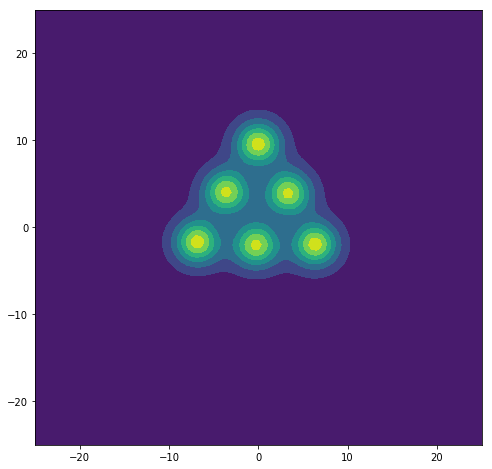

In [17]:
rho, nelec = rho6, 6
V0 = 1/s**(2*(2-p))*rho**(p-1)

kappa = p/(p-1) - 1
print("kappa = ", kappa)

plt.figure(figsize = (8,8))
plt.contourf(xx, yy, V0)

In [16]:
rho, nelec = rho1, 1
new_Lx, new_Ly, new_eps = 200, 200, 0.25
V0 = 1/s**(2*(2-p))*rho**(p-1)

V1, L1 = LT.find_best_LT(V0, kappa, Lx, Ly, eps, 1, Niter = 25)

--------------------
kappa = 1.298701, p = 1.770000, kp = 4.347826
I0 =  3.55566543491108
---------------------
|    Lsc = 0.034618
---------------------
i = 0, L > 0.033234
i = 1, L > 0.033234


In [28]:
rho, nelec = rho6, 6
V0 = 1/s**(2*(2-p))*rho**(p-1)

V6, L6 = LT.find_best_LT(V0, kappa, Lx, Ly, eps, nelec, Niter = 25)

--------------------
kappa = 1.298701, p = 1.770000, kp = 4.347826
I0 =  22.27687551756419
---------------------
|    Lsc = 0.034618
---------------------
i = 0, neigs = 6, L > 0.033667, ratio = 0.972526
i = 1, neigs = 6, L > 0.033695, ratio = 0.973337
i = 2, neigs = 6, L > 0.033720, ratio = 0.974053
i = 3, neigs = 6, L > 0.033747, ratio = 0.974841
i = 4, neigs = 6, L > 0.033779, ratio = 0.975738
i = 5, neigs = 6, L > 0.033814, ratio = 0.976756
i = 6, neigs = 6, L > 0.033854, ratio = 0.977906
i = 7, neigs = 6, L > 0.033898, ratio = 0.979194
i = 8, neigs = 6, L > 0.033947, ratio = 0.980618
i = 9, neigs = 6, L > 0.034001, ratio = 0.982160
i = 10, neigs = 6, L > 0.034056, ratio = 0.983767
i = 11, neigs = 6, L > 0.034111, ratio = 0.985328
i = 12, neigs = 6, L > 0.034156, ratio = 0.986647
i = 13, neigs = 6, L > 0.034183, ratio = 0.987433
i = 14, neigs = 6, L > 0.034180, ratio = 0.987349


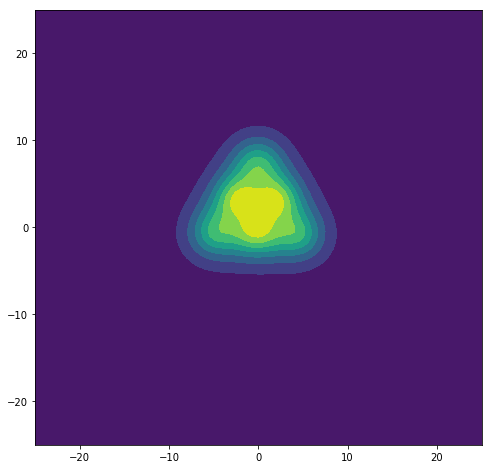

In [29]:
plt.figure(figsize = (8,8))
plt.contourf(xx, yy, V6)

In [30]:
rho, nelec = rho10, 10
V0 = 1/s**(2*(2-p))*rho**(p-1)

V6, L6 = LT.find_best_LT(V0, kappa, Lx, Ly, eps, nelec, Niter = 25)

--------------------
kappa = 1.298701, p = 1.770000, kp = 4.347826
I0 =  37.46317141870963
---------------------
|    Lsc = 0.034618
---------------------
i = 0, neigs = 11, L > 0.033650, ratio = 0.972034
i = 1, neigs = 11, L > 0.033684, ratio = 0.973018
i = 2, neigs = 11, L > 0.033709, ratio = 0.973733
i = 3, neigs = 11, L > 0.033732, ratio = 0.974396
i = 4, neigs = 11, L > 0.033756, ratio = 0.975074
i = 5, neigs = 11, L > 0.033780, ratio = 0.975792
i = 6, neigs = 12, L > 0.033808, ratio = 0.976591
i = 7, neigs = 12, L > 0.033841, ratio = 0.977535
i = 8, neigs = 12, L > 0.033877, ratio = 0.978575
i = 9, neigs = 12, L > 0.033915, ratio = 0.979690
i = 10, neigs = 12, L > 0.033957, ratio = 0.980879
i = 11, neigs = 12, L > 0.034000, ratio = 0.982147
i = 12, neigs = 12, L > 0.034047, ratio = 0.983493
i = 13, neigs = 12, L > 0.034096, ratio = 0.984906
i = 14, neigs = 12, L > 0.034146, ratio = 0.986349
i = 15, neigs = 12, L > 0.034194, ratio = 0.987747
i = 16, neigs = 11, L > 0.034239, ratio

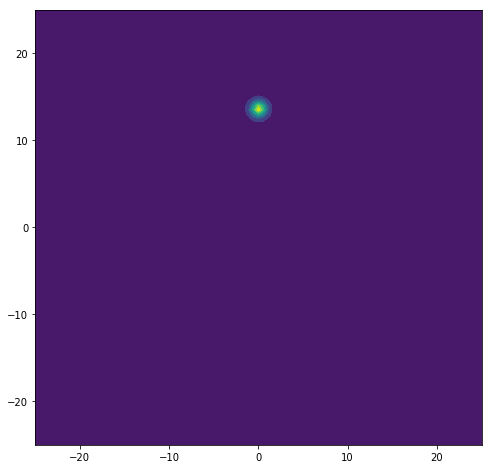

In [31]:
plt.figure(figsize = (8,8))
plt.contourf(xx, yy, V10)